In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.shape

(500, 9)

In [9]:
df.drop(columns="Serial No.",inplace=True)

In [10]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


In [20]:
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [29]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 8         
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss="mean_squared_error",optimizer="Adam")


In [32]:
history=model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 0s 18ms/step - loss: 0.2779 - val_loss: 0.2596
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2099 - val_loss: 0.1881
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1483 - val_loss: 0.1254
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0954 - val_loss: 0.0752
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0543 - val_loss: 0.0397
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0277 - val_loss: 0.0194
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0148 - val_loss: 0.0120
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0113 - val_loss: 0.0109
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 10/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0107 - val_loss: 0.0102
Epoch 11

In [33]:
Y_pred=model.predict(X_test_scaled)

In [35]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.7891009727302907

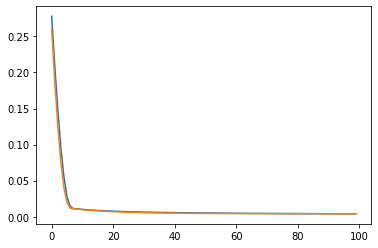

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])